The data is from a number of patients. The 12 first columns (age, an, ..., time) are features that should be used to predict the outcome in the last column (DEATH_EVENT).


In [ ]:
# Loading some functionality you might find useful. You might want other than this...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [ ]:
# Downloading data 
url = 'https://raw.githubusercontent.com/BoBernhardsson/frtn65_exam2022/main/data.csv'
data = pd.read_csv(url)
data.head()

,age,an,cr,di,ej,hi,pl,se1,se2,sex,sm,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Picking out features and labels
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
(X.shape,y.shape)

((299, 12), (299,))

In [ ]:
# select which features to use

X = data.drop(columns=['DEATH_EVENT'])
y = data.loc[:,'DEATH_EVENT'].values

In [ ]:
# Creating some initial KNN models and evaluating accuracy 
Ndata = data.shape[0]
for nr in range(1,10):
   knnmodel = KNeighborsClassifier(n_neighbors = nr)
   knnmodel.fit(X=X,y=y)
   predictions = knnmodel.predict(X=X)
   print('neighbors = {0}: accuracy = {1:.3f}'.format(nr,1-sum(abs(predictions-y))/Ndata))

neighbors = 1: accuracy = 1.000
neighbors = 2: accuracy = 0.779
neighbors = 3: accuracy = 0.779
neighbors = 4: accuracy = 0.726
neighbors = 5: accuracy = 0.749
neighbors = 6: accuracy = 0.719
neighbors = 7: accuracy = 0.722
neighbors = 8: accuracy = 0.702
neighbors = 9: accuracy = 0.709


In [ ]:
features = ['age', 'cr', 'ej', 'pl', 'se1', 'se2', 'time']
features_categ = ['an','di', 'hi', 'sex', 'sm']

#scale the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_preprocessor = StandardScaler()

#do one-hot encoding for categorical features
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, features_categ),
    ('standard-scaler', numerical_preprocessor, features)])

In [ ]:
from sklearn.pipeline import Pipeline

#try Random Forest
clf = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100,max_depth=3))])

In [ ]:
#split the dataset into trainig and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf.fit(x_train, np.ravel(y_train))
print(clf.score(x_train,np.ravel(y_train)))
print('model score: %.3f' % clf.score(x_test,np.ravel(y_test)))

0.9121338912133892
model score: 0.733


In [ ]:
#evaluate the model using cross-validation
score = cross_val_score(clf, X, np.ravel(y), cv=25)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean()*100, score.std()))
score_test = clf.score(x_test, np.ravel(y_test))
print('Test score: ', '{0:.4f}'.format(score_test*100))

82.58 accuracy with a standard deviation of 0.15
Test score:  73.3333


In [ ]:
clf = RandomForestClassifier()
#find the best model using GridSearch
param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [3, 4, 5],
    }

search = GridSearchCV(clf, param_grid, cv=4, verbose=1,n_jobs=-1)

search.fit(x_train, np.ravel(y_train))
score = search.score(x_test, np.ravel(y_test))
print("Best CV score: {} using {}".format(search.best_score_, search.best_params_))
print("Test accuracy: {}".format(score))

Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best CV score: 0.8703389830508474 using {'max_depth': 4, 'n_estimators': 100}
Test accuracy: 0.75


In [ ]:
randomForestModel = RandomForestClassifier(n_estimators=100,max_depth=5)

#evaluate using cross-validation
score=cross_val_score(randomForestModel, X, y, cv=20)

In [ ]:
randomForestModel.fit(x_train,np.ravel(y_train))
print('Training score: ', randomForestModel.score(x_train,np.ravel(y_train)))
print('Test score: ', randomForestModel.score(x_test,np.ravel(y_test)))

Training score:  0.9623430962343096
Test score:  0.7666666666666667


In [ ]:
#make a prediction and evaluate the performance
y_pred = randomForestModel.predict(x_test)

score_new = randomForestModel.score(x_test, y_test)
print('Test score: ', score_new)

Test score:  0.7666666666666667


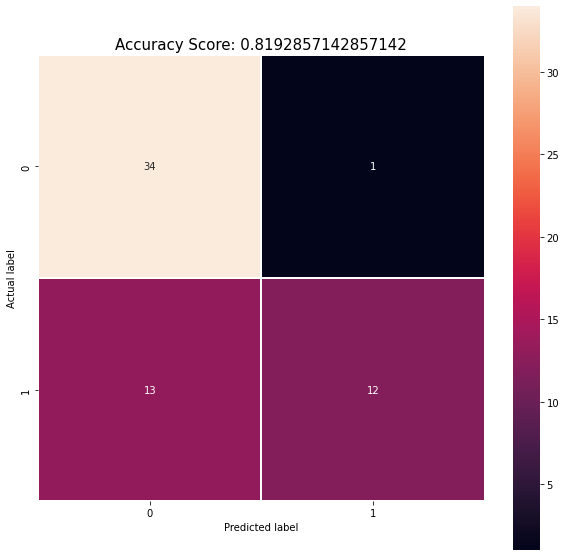

In [ ]:
import seaborn as sns
from sklearn import metrics
#confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score.mean()), size = 15);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


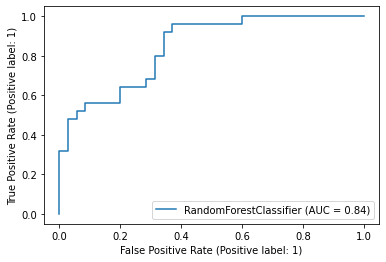

In [ ]:
from sklearn import metrics
#AUC
metrics.plot_roc_curve(randomForestModel, x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, randomForestModel.predict(x_test)))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83        35
           1       0.92      0.48      0.63        25

    accuracy                           0.77        60
   macro avg       0.82      0.73      0.73        60
weighted avg       0.81      0.77      0.75        60



In [ ]:
from pandas import DataFrame
feature_df = DataFrame(data.columns.delete(0))
feature_df.columns = ['Features']
feature_df["Feature Importance"] = pd.Series(randomForestModel.feature_importances_)

#view feature importance according to Random Forest model
feature_df

,Features,Feature Importance
0,an,0.093646
1,cr,0.007402
2,di,0.046163
3,ej,0.005310
4,hi,0.118364
5,pl,0.005491
6,se1,0.050751
7,se2,0.170030
8,sex,0.039998
9,sm,0.008117


In [ ]:
#KNN model

clf = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
clf.fit(x_train,np.ravel(y_train))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['an', 'di', 'hi', 'sex',
                                                   'sm']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['age', 'cr', 'ej', 'pl',
                                                   'se1', 'se2', 'time'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
#evaluate the model using cross-validation
score = cross_val_score(clf, X, np.ravel(y), cv=25)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()))
score_test = clf.score(x_test, np.ravel(y_test))
print('Test score: ', '{0:.4f}'.format(score_test*100))

71.58 accuracy with a standard deviation of 0.08
Test score:  75.0000


In [ ]:
#make a prediction and evaluate the performance
y_pred = clf.predict(x_test)

score_new = clf.score(x_test, y_test)
print('Test score: ', score_new)

Test score:  0.75


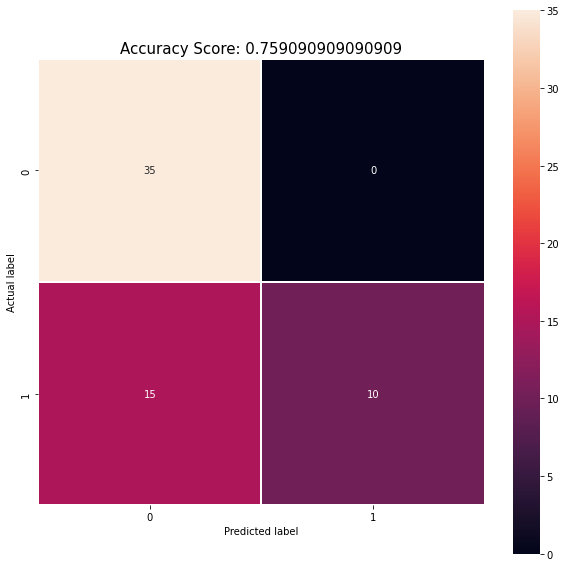

In [ ]:
import seaborn as sns
from sklearn import metrics

#confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score.mean()), size = 15);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


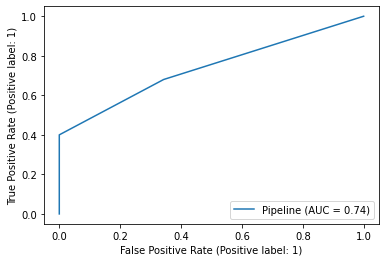

In [ ]:
from sklearn import metrics
#AUC
metrics.plot_roc_curve(clf, x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        35
           1       1.00      0.40      0.57        25

    accuracy                           0.75        60
   macro avg       0.85      0.70      0.70        60
weighted avg       0.82      0.75      0.72        60



In [ ]:
#Boosting model

from sklearn.ensemble import GradientBoostingClassifier
#find the best learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb =  Pipeline(steps = [('preprocessor', preprocessor), ('Classifier', GradientBoostingClassifier(n_estimators=30, learning_rate = learning_rate, max_features=13, max_depth = 3, random_state = 0))])
    gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.946
Accuracy score (validation): 0.733
Learning rate:  0.1
Accuracy score (training): 0.950
Accuracy score (validation): 0.750
Learning rate:  0.25
Accuracy score (training): 0.996
Accuracy score (validation): 0.800
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.767
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.683
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.750


In [ ]:
clf =  Pipeline(steps = [('preprocessor', preprocessor), ('Classifier', GradientBoostingClassifier(n_estimators= 30, learning_rate = 0.25, max_features=13, max_depth = 3, random_state = 0))])

In [ ]:
clf.fit(x_train,np.ravel(y_train))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['an', 'di', 'hi', 'sex',
                                                   'sm']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['age', 'cr', 'ej', 'pl',
                                                   'se1', 'se2', 'time'])])),
                ('Classifier',
                 GradientBoostingClassifier(learning_rate=0.25, max_features=13,
                                            n_estimators=30, random_state=0))])

In [ ]:
#evaluate the models using cross-validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, np.ravel(y), cv=25)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()))
score = clf.score(x_test, np.ravel(y_test))
print('Test score (Validation): ', '{0:.4f}'.format(score*100))

79.91 accuracy with a standard deviation of 0.14
Test score (Validation):  80.0000


In [ ]:
#make a prediction and evaluate the performance
y_pred = clf.predict(x_test)

score_test = clf.score(x_test, y_test)
print('Test score: ', score_test )

Test score:  0.8


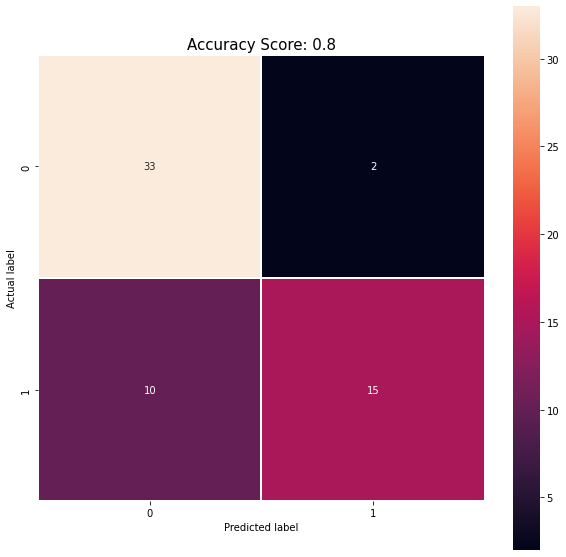

In [ ]:
import seaborn as sns
from sklearn import metrics

#confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score.mean()), size = 15);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


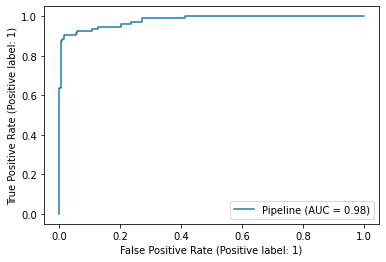

In [ ]:
from sklearn import metrics
#AUC
metrics.plot_roc_curve(clf, X, y)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(x_test)))


              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



## Death vs time
The boxplot below illustrates the relationship between death and how long time it was between the measurements were taken and the followup event, when the patient health was checked (female=blue, male=orange).

It is noted that  short followup time is highly related to high probability of death, for both sexes. An explanation could be that severly unhealthy patients were followed up earlier, based on medical expert decisions.

time_survived = 158.3
time_dead = 70.9


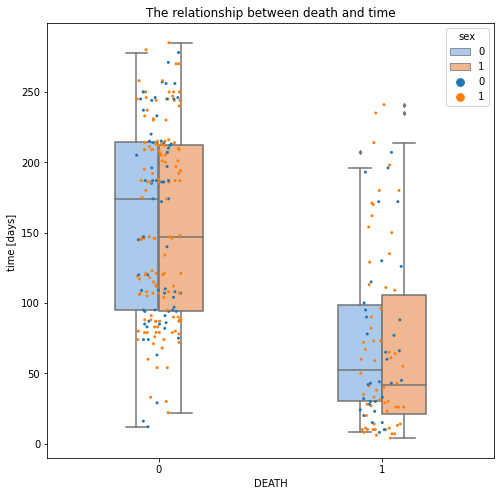

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))
survive = data.loc[(data.DEATH_EVENT == 0)].time
death = data.loc[(data.DEATH_EVENT == 1)].time
print('time_survived = {:.1f}'.format(survive.mean()))
print('time_dead = {:.1f}'.format(death.mean()))

sns.boxplot(data = data, x = 'DEATH_EVENT', y = 'time', hue = 'sex', width = 0.4, ax = ax, fliersize = 3, palette=sns.color_palette("pastel"))
sns.stripplot(data = data, x = 'DEATH_EVENT', y = 'time', hue = 'sex', size = 3, palette=sns.color_palette())
ax.set(xlabel = 'DEATH', ylabel = "time [days] ", title = 'The relationship between death and time')
plt.show()

In [ ]:
# If we want to drop time as feature, we can use
Xnew = data.iloc[:,:-2].values

In [ ]:
# select which features to use

Xnew = data.drop(columns=['DEATH_EVENT', 'time', 'sm', 'ej','age','cr','pl','se1','an','di','sex'])
y = data.loc[:,'DEATH_EVENT'].values

In [ ]:
features = ['se2','hi']
#features_categ = ['an','di', 'hi', 'sex']

#scale the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_preprocessor = StandardScaler()

#do one-hot encoding for categorical features
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    #('one-hot-encoder', categorical_preprocessor, features_categ),
    ('standard-scaler', numerical_preprocessor, features)])

In [ ]:
from sklearn.pipeline import Pipeline

#try Random Forest
clf = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=1000,max_depth=3))])

In [ ]:
#split the dataset into trainig and testing
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(Xnew, y, test_size=0.2, random_state=42)

In [ ]:
clf.fit(x_train_new, np.ravel(y_train_new))
print(clf.score(x_train_new,np.ravel(y_train_new)))
print('model score: %.3f' % clf.score(x_test_new,np.ravel(y_test_new)))

0.7280334728033473
model score: 0.617


In [ ]:
clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [3, 4, 5],
    }

search = GridSearchCV(clf, param_grid, cv=4, verbose=1,n_jobs=-1)

search.fit(x_train_new, np.ravel(y_train_new))
score = search.score(x_test_new, np.ravel(y_test_new))
print("Best CV score: {} using {}".format(search.best_score_, search.best_params_))
print("Test accuracy: {}".format(score))

Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best CV score: 0.6903954802259887 using {'max_depth': 4, 'n_estimators': 100}
Test accuracy: 0.5666666666666667


In [ ]:
randomForestModel = RandomForestClassifier(n_estimators=100,max_depth=4)

#cross-val score
score=cross_val_score(randomForestModel, Xnew, y, cv=20)

In [ ]:
randomForestModel.fit(x_train_new,np.ravel(y_train_new))
print('Training score: ', randomForestModel.score(x_train_new,np.ravel(y_train_new)))
print('Test score: ', randomForestModel.score(x_test_new,np.ravel(y_test_new)))

Training score:  0.7364016736401674
Test score:  0.6166666666666667
